In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#отображение графиков прямо в ноутбуке
%matplotlib inline

In [4]:
anime = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

# Проверяем размеры и первые строки
print("anime shape:", anime.shape)
anime.head()

anime shape: (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
# убрать неоцененные записи
ratings_clean = ratings[ratings['rating'] != -1]
ratings_clean.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [8]:
# объединяем данные: рейтинг + инфо об аниме
df = pd.merge(ratings_clean, anime, on='anime_id', how='left')
df.shape
df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892.0
1,1,11617,10,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School",TV,12,7.70,398660.0
2,1,11757,10,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100.0
3,1,15451,10,High School DxD New,"Action, Comedy, Demons, Ecchi, Harem, Romance,...",TV,12,7.87,266657.0
4,2,11771,10,Kuroko no Basket,"Comedy, School, Shounen, Sports",TV,25,8.46,338315.0


Топ-10 самых популярных аниме (по числу участников):
                                 name    members
22                         Death Note  1013917.0
58                 Shingeki no Kyojin   896229.0
2                    Sword Art Online   893100.0
32   Fullmetal Alchemist: Brotherhood   793665.0
271                      Angel Beats!   717796.0
601   Code Geass: Hangyaku no Lelouch   715151.0
5                              Naruto   683297.0
308                       Steins;Gate   673572.0
677                  Mirai Nikki (TV)   657190.0
242                         Toradora!   633817.0


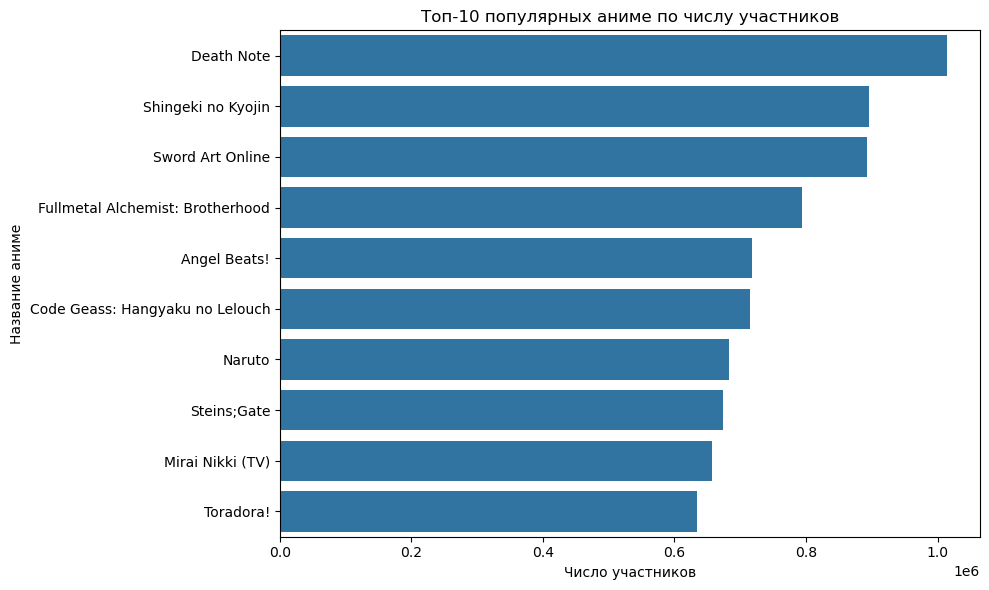

In [10]:
# Самые популярные аниме по количеству участников 

# Убираем строки, где members пустой
df_clean = df[df['members'].notna()]

# Сортируем по числу участников
top_members = df_clean[['name', 'members']].drop_duplicates().sort_values(by='members', ascending=False).head(10)

# Показываем
print("Топ-10 самых популярных аниме (по числу участников):")
print(top_members)

# Строим график
plt.figure(figsize=(10,6))
sns.barplot(x=top_members['members'], y=top_members['name'])

plt.title('Топ-10 популярных аниме по числу участников')
plt.xlabel('Число участников')
plt.ylabel('Название аниме')
plt.tight_layout()
plt.show()